Social Data Science WS19/20

# Home Assignment 2


Submit your solution via Moodle until 23.59pm on Wednesday, November 27th. Late submissions are accepted for 12 hours following the deadline, with 1/3 of the total possible points deducted from the score.

Submit your solutions in teams of up 2-3 members. **Single student submissions will not be graded anymore.**
Please denote all members of the team with their student id and full name in the notebook. In this home assignment, you have to submit an .ipynb notebook and a file "beta.npy" as specified in task 3. Do not submit anything else than these two files!

Cite ALL your sources for coding this home assignment. In case of plagiarism (copying solutions from other teams or from the internet) ALL team members will be expelled from the course without warning.

If you have any general questions regarding this assignment, please ask on Moodle.

##### List team members, including all student IDs here:
1. Student 1 (123456)
2. Student 2 (123457)
3. (optional) Student 3 (123458)

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as statsmodels

### Task 1: Causal Inference (1 pt)

Suppose you conduct a study to evaluate the effect of a new procedure for coronary bypass surgery that is supposed to help with the postoperative healing process. Since the new procedure is more risky than the old one, it is rarely performed on patients who are over 80 years old. However, there is also hardly any data on under 80-year olds that have taken the old treatment. 

You can find the data from the study in "bypass.csv", where _stay_ is the length of the hospital stay after surgery, _age_ is the age of the patient, and _new_ is the binary indicator variable specifying whether the new surgical procedure was used. Additionally, there is a column _severity_ which quantifies the severity of preoperative diseases.

Perform a regression analysis to draw a causal inference whether the new surgery method shortens the length of the postoperative hospital stay. Can you observe a significant effect? Would you generally recommend to apply the new surgery method?
Provide a thorough explanation of your answers and the steps in your analysis!

/Users/sunwen/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


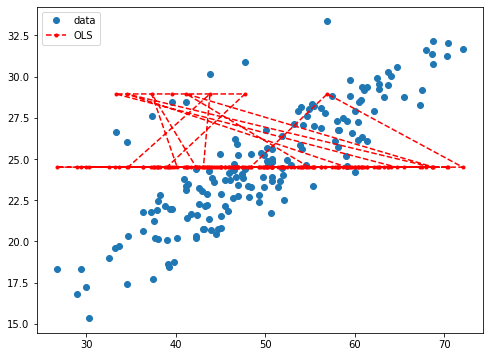

In [45]:
df = pd.read_csv("bypass.csv")
df = df[df.age < 80]
df = df.set_index('age')
df

# print(df.head())
# print(df.shape)
# df_1 = df.loc[df.new == 1]
# df_2 = df.loc[df.new == 0]

# X1 = sm.add_constant(df_1.new)
# X2 = sm.add_constant(df_2.new)
# # pred = [df_1.new,df_2.new]
# # X = sm.add_constant(df[pred])
# y = df.stay


# results_1 = sm.OLS(y, X1).fit()
# results_2 = sm.OLS(y, X2).fit()

# print(results_1.summary())
# print(results_2.summary())
# # print(results.params)

x = df.severity

X1 = sm.add_constant(df.new)
y = df.stay

reg1 = sm.OLS(y, X1).fit()

reg1.summary()

y_fitted = reg1.fittedvalues
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label='data')
ax.plot(x, y_fitted, 'r--.',label='OLS')
ax.legend(loc='best')


### Task 2: Naive Bayes on Continuous Data (1 pt)

In lecture we have introduced the _Naive Bayes_ classifier, in which for each feature, we compute the empirical probabilities 
$ P(x_i|y) $ to form our predictions. For discrete data, we have learned in lecture that these probabilities are estimated from the raw class-conditional feature counts. For continuous features however, this approach obviously does not make sense.
Instead, for continuous features, one usually makes the assumption that these  are normally distributed. Thus for continuous features, one usually models the class-conditional probabilities via 
$$ P(X_i = x| y = C_k) = \frac{1}{\sqrt{2\pi \sigma_{ik}^2}} \exp\left(-\frac{x_i-\mu_{ik}}{2\sigma_{ik}^2}\right)$$
where $\mu_{ik}$ and $\sigma_{ik}$ are the mean and variance of the features $X_i$ that are classed as $c_k$.
A Naive Bayes classifier for which all features are assumed to be continuous and normally distribited is also called _Gaussian Naive Bayes_ classifier.

Implement a class that performs Naive Bayes classification on both discrete and continuous data, using the class and function signatures and specifications in the cell below, which are designed to be similar to the model classes in sklearn. 
When passing your data to the fit() function, by default your classifier should treat all columns as continuous, i.e. normally distributed as explained above. Discrete features have to be specified upon fitting, by passing a list of integers specifying the indices of the columns that are to be treated as discrete features.

Note: You may use any function from the numpy library, but __NO__ function from the scikit-learn library. Further, you may assume that all input data is valid, i.e. you do not need to check whether for instance the feature matrix X has as many rows as the class vector $y$.

In [3]:
class NaiveBayes:
    
    def __init__():
        # your code here
        
    
    # fit your model, nothing is returned
    # X: two dimensional numpy array describing the feature matrix to train on
    # y: one dimensional numpy array or list representing the class vector used in training
    # discrete columns: optional list of indices describing the coumns in X that are to be treated as numerical.
    def fit(X, y, discrete_columns = None):
        # your code here
    
    # predict function: use the previously trained model to make a prediction
    # -> return a vector y_hat of predicted classes.
    # X: two dimensional numpy array describing the feature matrix to predict on
    def predict(X):
        # your code here

IndentationError: expected an indented block (<ipython-input-3-8b836044d4fe>, line 11)

### Task 3: Predicting House Prizes (3 pts)

In this task you have to create a regression model to predict housing prices. We are providing you with a training dataset that you have to use to form your model, but we are going to grade your model based on the performance on a test set that is not known to you.

__Grading:__ We will measure the performance of your model in terms of the MSE error on a test set that we are holding out. We will create a simple baseline model ourselves, which will be based on a little feature engineering, and a ridge regression model that is just run with default parameters from scikit-learn. To obtain 50% of the points in this task, your model should show a better performance on the test set than our baseline. The remaining 50% of the points will be awarded based on your performance against the rest of the class. The best models will get full marks, and the rest of the marks will degrade along with the testing error scores.


__What to submit:__ In your submission, you have to provide the following things: 
1. Two functions that preprocess the input data into the format that you chose to use in your final regression model. The first function should perform the main part of the feature engineering and return an unscaled predictor matrix. Thus, its input has to be a pandas dataframe consisting of all the predictor colums in the data, and its output has to be a two-dimensional numpy array $X$. The second function should scale the preprocessed matrix. Its input is a training matrix that your scaling model is based on, and a test matrix that your scaling model is then to be applied on, to return a scaled test matrix. The exact signatures and the testing pipeline can be found below. Note that the scaling function may also perform other things than scaling, e.g. adding a constant column or adding interactions, as long as the testing pipeline below works properly. 
2. A corresponding parameter vector $\beta$, that is saved as a numpy array into the file "beta.npy". It is used to compute the model predictions via $\hat{y} = X\beta$. Note that any other models next to regression models are not admissible.
3. All the code that you used to optimize your final model. Submissions that show no code in that regard will not be awarded any points. Further, we encourage to report all the exploratory analysis that you did, and report some of the errors that your model achieved on some validation data. This may grant some extra points in the case that your model does not outperform our baseline on the testing data.

Note that in this task, you may use any Python library that can be installed via pip. In particular, you may use libraries like statsmodel or scikit-learn. 

In the cells below, you can find the signatures of the preprocessing and scaling functions, the pipeline that we are going to use to make predictions, and some space where your code for exploration and optimization can go. Note that your model, i.e. both preprocessing functions and the parameter vector have to work on this pipeline. If this pipeline cell does not execute, you will not get any points. 

                         PropertySize  LandValue  LivingArea       Age  \
PropertySize                 1.000000   0.057825    0.187858 -0.044167   
LandValue                    0.057825   1.000000    0.422883  0.005484   
LivingArea                   0.187858   0.422883    1.000000 -0.147072   
Age                         -0.044167   0.005484   -0.147072  1.000000   
Rooms                        0.153050   0.291396    0.736769 -0.073143   
Bedrooms                     0.130005   0.211478    0.664132  0.052810   
Bathrooms                    0.133499   0.300261    0.719980 -0.345456   
Fireplaces                   0.110756   0.229746    0.470207 -0.157538   
NeighborhoodHigherEdPct     -0.035790   0.231796    0.207153 -0.021527   
Price                        0.184418   0.566558    0.709803 -0.161071   

                            Rooms  Bedrooms  Bathrooms  Fireplaces  \
PropertySize             0.153050  0.130005   0.133499    0.110756   
LandValue                0.291396  0.211478  

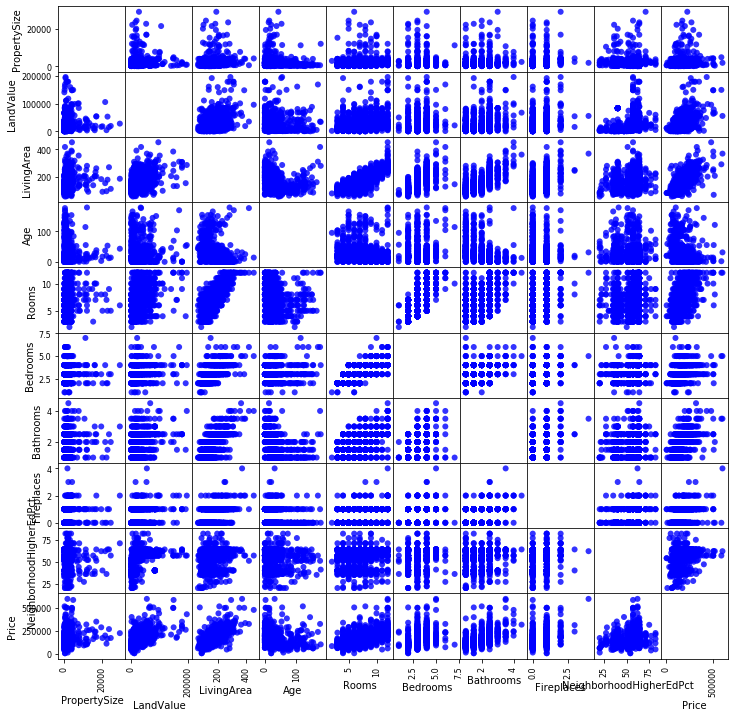

,LandValue,LivingArea,Rooms,Bedrooms,Bathrooms,Fireplaces,Price,HeatingSystem_air,HeatingSystem_electric,HeatingSystem_water/steam,HeatingFuel_electricity,HeatingFuel_gas,HeatingFuel_oil,HasCentralAC_No,HasCentralAC_Yes,AtWaterfront_No,AtWaterfront_Yes,SewerSystem_none,SewerSystem_public,SewerSystem_septic
0,83769,305,12,4,3.0,1,245385,1,0,0,0,1,0,1,0,1,0,0,1,0
1,3000,85,4,2,1.0,0,34615,1,0,0,0,1,0,1,0,1,0,0,0,1
2,15077,120,6,2,1.5,1,151538,1,0,0,0,1,0,1,0,1,0,0,1,0
3,21923,238,12,4,2.5,1,222500,0,0,1,0,0,1,1,0,1,0,0,0,1
4,12077,85,3,2,1.5,1,111538,1,0,0,0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,11538,78,3,2,1.0,0,65346,1,0,0,0,1,0,1,0,1,0,0,1,0
1196,27692,204,8,3,2.5,1,267500,1,0,0,0,1,0,0,1,1,0,0,1,0
1197,27308,166,7,3,2.5,1,161538,1,0,0,0,1,0,0,1,1,0,0,1,0
1198,10000,196,10,3,2.5,1,226231,0,0,1,0,1,0,1,0,1,0,0,0,1


In [64]:
df_train = pd.read_csv('housing_train.csv')
# df_train.info()
# df_train.isnull().sum().sort_values(ascending=False)
# df_train.dtypes

df_train['Price'].describe()
print(df_train.corr())

# 绘图 draw the graph of relationship among every two variables
fig = pd.plotting.scatter_matrix(df_train,figsize=(12,12),c ='blue',marker = 'o',diagonal='',alpha = 0.8,range_padding=0.2)  # diagonal只能为'hist'/'kde'
plt.show()
# delete the variables, which the corr is smaller than 0.2
df_train = df_train.drop(columns=['PropertySize', 'Age', 'NeighborhoodHigherEdPct'])

# Create Dummy variables for the categorical features
df_train = pd.get_dummies(df_train, columns=['HeatingSystem'])
df_train = pd.get_dummies(df_train, columns=['HeatingFuel'])
df_train = pd.get_dummies(df_train, columns=['HasCentralAC'])
df_train = pd.get_dummies(df_train, columns=['AtWaterfront'])
df_train = pd.get_dummies(df_train, columns=['SewerSystem'])



In [ ]:
# signature of preprocessing & scaling functions - you MUST use these function signatures in your final submission.

def preprocess(dfX):
    # insert your code here
    return X #X has to be a two-dimensional numpy array

# inputs are both numpy matrices
def scale(X_train, X_test):
    # insert your code here
    return X_test_scaled  #X has to be a two-dimensional numpy array as well

In [ ]:
# testing pipeline, for illustration. Test data will have the same format as the training data. Do NOT edit this cell, 
# but feel free to copy it to test it yourself.  

from sklearn.metrics import mean_squared_error

# read in data
df_train = pd.read_csv("housing_train.csv")
df_test = pd.read_csv("housing_test.csv")

# split predictor dataframe from complete data
dfX_train = df_train.iloc[:,:-1]
dfX_test = df_test.iloc[:,:-1]

# preprocess training and test data - preprocessed training data is always needed for scaling
X_train = preprocess(dfX_train)
X_test = preprocess(dfX_test)

# finally, scale your data into a proper format. Note that for scaling the training data,
# you should call 'X_train_scaled = scale(X_train, X_train)'
X_test_scaled = scale(X_train,X_test)

print(X_test_scaled)

# load parameter vector resulting from your optimized model
beta = np.load("beta.npy")

# apply your vector to predict on the test data
y_pred = np.dot(X_test_scaled,beta)


# get target column from test data and compute MSE
y_test = df_test.iloc[:,-1].to_numpy()
print(mean_squared_error(y_test,y_pred))

You can illustrate your process of model optimization in the cell(s) below. Feel free to add cells where necessary.